In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots




In [2]:
# Load the dataset
df = pd.read_csv('vehicles.csv')

# Preview the dataset
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
# Check the structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
df.shape

(426880, 26)

In [5]:
# Calculate missing values and their percentage
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

# Combine into a DataFrame for better visibility
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_df


,Missing Values,Percentage (%)
county,426880,100.000000
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753


In [6]:
df.dtypes


id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [7]:
# Check unique values and most frequent entries for each column
for col in df.columns:
    print(col, ':', df[col].nunique())  # Count unique values
    print(df[col].value_counts().nlargest(5))  # Show the 5 most frequent values
    print('\n' + '*' * 20 + '\n')


id : 426880
id
7301949724    1
7301950980    1
7301951550    1
7301951544    1
7301952155    1
Name: count, dtype: int64

********************

url : 426880
url
https://wyoming.craigslist.org/ctd/d/atlanta-2017-genesis-g80-38-sedan-4d/7301949724.html       1
https://wyoming.craigslist.org/ctd/d/atlanta-2018-genesis-g80-38-sedan-4d/7301950980.html       1
https://wyoming.craigslist.org/ctd/d/atlanta-2019-alfa-romeo-giulia-ti-sedan/7301951550.html    1
https://wyoming.craigslist.org/ctd/d/atlanta-2017-infiniti-qx80-sport/7301951544.html           1
https://wyoming.craigslist.org/ctd/d/atlanta-2020-caddy-cadillac-xt6-premium/7301952155.html    1
Name: count, dtype: int64

********************

region : 404
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
Name: count, dtype: int64

********************

region_url : 413
region_url
https://spokane.craigslist.org    2988
http

In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

np.int64(0)

In [9]:
# # Drop duplicate rows
# df = df.drop_duplicates()
# #to reset the index after removing duplicates
# df.reset_index(drop=True, inplace=True)

In [10]:
# Describe numerical columns
numerical_summary = df.describe()
numerical_summary



,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [11]:
# Describe categorical columns
categorical_summary = df.describe(include='object')
categorical_summary

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,426880,426812
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,51,381536
top,https://wyoming.craigslist.org/ctd/d/atlanta-2...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,50614,12


In [12]:
# Check for rows with invalid prices
invalid_prices = df[(df['price'] == 0) | (df['price'] > 1000000)]
invalid_prices


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
10,7218893038,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
11,7218325704,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
12,7217788283,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
13,7217147606,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
14,7209027818,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,https://wyoming.craigslist.org/ctd/d/casper-pe...,wyoming,https://wyoming.craigslist.org,0,2018.0,NaN,peterbilt 579,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00F0F_kfjCcZyncy...,"◄ PRICES STARTING AT $57,500 ($57,500 and up, ...",NaN,wy,42.862274,-106.307144,2021-04-07T15:15:05-0600
426812,7302877815,https://wyoming.craigslist.org/ctd/d/frederick...,wyoming,https://wyoming.craigslist.org,0,2006.0,toyota,scion tc,excellent,4 cylinders,...,NaN,NaN,silver,https://images.craigslist.org/00B0B_dqmLwdZw8Q...,2006 *** TOYOTA SCION TC *** Call or Text ...,NaN,wy,40.114685,-104.971971,2021-04-06T17:00:19-0600
426832,7302353283,https://wyoming.craigslist.org/ctd/d/frederick...,wyoming,https://wyoming.craigslist.org,0,2004.0,toyota,prius,excellent,4 cylinders,...,NaN,NaN,blue,https://images.craigslist.org/00V0V_7Ap4arGS9S...,"2004 *** TOYOTA PRIUS *** Call or Text ""To...",NaN,wy,40.114685,-104.971971,2021-04-05T17:00:55-0600
426836,7302301268,https://wyoming.craigslist.org/ctd/d/dassel-20...,wyoming,https://wyoming.craigslist.org,0,2018.0,ram,2500,excellent,6 cylinders,...,full-size,truck,white,https://images.craigslist.org/00i0i_3cSpgdy0qQ...,Phone: 320-275-2150 2018 RAM 2500 Tradesman ...,NaN,wy,45.082436,-94.334686,2021-04-05T15:18:42-0600


In [13]:

# Check unique years and their counts
df['year'].value_counts().sort_index()



year
1900.0       12
1901.0        3
1902.0        1
1903.0       12
1905.0        1
          ...  
2018.0    36369
2019.0    25375
2020.0    19298
2021.0     2396
2022.0      133
Name: count, Length: 114, dtype: int64

In [14]:
# Analyze the odometer column
df['odometer'].describe()


count    4.224800e+05
mean     9.804333e+04
std      2.138815e+05
min      0.000000e+00
25%      3.770400e+04
50%      8.554800e+04
75%      1.335425e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [15]:
# Check unique values and their counts in the 'condition' column
df['condition'].value_counts(dropna=False)


condition
NaN          174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [16]:
# Check unique values and their counts in the 'price' column
df['price'].value_counts(dropna=False)

price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
12589        1
20887        1
22383        1
17455        1
37121        1
Name: count, Length: 15655, dtype: int64

In [17]:
print(df['model'].unique())

[nan 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']


# Data Assessment and Issues Identification

## Overview of the Dataset
The dataset contains **426,880** entries and **26 columns** related to car listings from Craigslist. The columns include details like price, year, manufacturer, model, car condition, and geographic location.

## Issues Identified in the Dataset

### 1. **Missing Values**
Several columns contain significant amounts of missing data, including:
- **`county`**: 100% of the entries are missing, which suggests that this column is not useful and should be dropped.
- **`size`**: 71.77% of the entries are missing. This could potentially be imputed or dropped depending on its importance.
- **`cylinders`**: 41.62% missing. It could be replaced with a placeholder like 'Unknown' or handled through imputation.
- **`condition`**: 40.79% missing, similar to `cylinders`, it needs to be handled with either imputation or a default value.
- **Other columns with missing data** include `VIN`, `drive`, `paint_color`, `type`, `manufacturer`, `title_status`, `lat`, `long`, and `model`. These will require imputation or removal, depending on the analysis requirements.

### 2. **Data Types**
- **`year`** is a floating-point type but should be an integer. The conversion of this column will be necessary to ensure consistency.
- **`posting_date`** is in object format, but it should be converted to a proper datetime format for easier manipulation.


### 3. **Outliers and Invalid Values**
- **`price`**: There are entries with a price of `0`, which is invalid. These should be replaced with the median price from valid entries.

### 4. **Inconsistent Data**
- **`model`**: Contains many unique models with inconsistencies in capitalization and formatting (e.g., sierra 1500 crew cab slt vs. Paige Glenbrook Touring), which should be standardized for consistency.


### 5. **Unnecessary Columns**
- **`county`**: This column has 100% missing data, so it should be dropped from the dataset.
- **`VIN`**: This column has a high amount of missing values (37.73%). Depending on the project needs, this column may either be imputed or dropped.


### 6. **URLs: Redundant for Analysis** (url , region_url and image_url)
URLs: The url column contains unique links to car listings, but it is not essential for analysis unless additional data needs to be extracted from the URLs, such as for scraping images or other content. For most structured data analysis tasks, this column can be safely dropped.

### 7. **Descriptions: Potential for Advanced Analysis**
Descriptions: The description column contains textual details about each car, which may be useful for tasks like sentiment analysis or feature extraction in Natural Language Processing (NLP). However, for most standard data analysis tasks, this column may not add value and can be removed if not relevant.

### 8. **Categorical Values**
- **`condition`**: The values include `good`, `excellent`, `like new`, `fair`, `new`, and `salvage`, but the column has significant missing data. This will need attention for imputation or cleaning.
- **`fuel`**: While most values are filled, there are other values such as `electric`, `diesel`, etc., but some entries have missing data.
- **`cylinders`**: Contains categorical values like `6 cylinders`, `4 cylinders`, and others, but it has 41.62% missing values.


# DATA CLEANING

## 1- handle missing values

- Categorical Columns: Missing values in specified categorical columns are replaced with 'Unknown'.
- Numerical Columns: Missing values are imputed with the median, except for posting_date.
- Posting Date: Missing values are filled with the most frequent value (mode).
- Column Removal: Drops the county column if it exists, as it has 100% missing data.

In [18]:

categorical_columns = ['condition', 'cylinders', 'fuel', 'drive', 'size', 'type', 'paint_color', 'title_status', 
                       'manufacturer', 'model', 'VIN', 'transmission', 'image_url', 'description']
numerical_columns = ['price', 'year', 'odometer', 'lat', 'long', 'posting_date']

# Impute categorical columns with 'Unknown'
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

# Impute numerical columns with the median (except posting_date, handle it separately)
for col in numerical_columns:
    if col != 'posting_date':  # Skip 'posting_date' for now
        df[col] = df[col].fillna(df[col].median())

# For 'posting_date', treat it as a numerical column and fill missing values with the mode (most frequent value)
df['posting_date'] = df['posting_date'].fillna(df['posting_date'].mode()[0])

# Drop 'county' column if it exists (since it's 100% missing)
if 'county' in df.columns:
    df.drop(columns=['county'], inplace=True)



In [19]:
# Check if missing values are handled
missing_values = df.isnull().sum()
print(missing_values)

id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64


## 2- Data Type Conversion 
- Convert 'year' Column: Changes the year column data type from float to integer (Int64). Errors are ignored during conversion.
- Convert 'posting_date' Column: Converts posting_date from object to datetime format, ensuring UTC timezone handling. Invalid values are coerced to NaT.

In [20]:
# Convert 'year' column from float to integer
df['year'] = df['year'].astype('Int64', errors='ignore')

# Convert 'posting_date' column from object to datetime with UTC handling
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce', utc=True)



In [21]:
# Verify the changes
print(df.dtypes)

id                            int64
url                          object
region                       object
region_url                   object
price                         int64
year                          Int64
manufacturer                 object
model                        object
condition                    object
cylinders                    object
fuel                         object
odometer                    float64
title_status                 object
transmission                 object
VIN                          object
drive                        object
size                         object
type                         object
paint_color                  object
image_url                    object
description                  object
state                        object
lat                         float64
long                        float64
posting_date    datetime64[ns, UTC]
dtype: object


## 3- Handling Outliers and Invalid Values

- Calculate Median: Computes the median of valid (non-zero) values in the price column.
- Replace Zeroes: Substitutes 0 values in the price column with the calculated median.

In [22]:
# Replace 0 values in 'price' column with the median of valid (non-zero) entries
median_price = df[df['price'] > 0]['price'].median()
df['price'] = df['price'].replace(0, median_price)

# Verify the change
print(df['price'].describe())


count    4.268800e+05
mean     7.635492e+04
std      1.218228e+07
min      1.000000e+00
25%      7.900000e+03
50%      1.500000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64


In [23]:

print(df['model'].unique())

['Unknown' 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']


## 4- Standardizing text data for consistensy
- Standardize Model Names: Converts the model column to proper case (capitalizes the first letter of each word) using .str.title().

In [24]:


# Standardize 'model' column to proper case (capitalize the first letter of each word)
df['model'] = df['model'].str.title()

# Verify the changes

print(df['model'].unique())


['Unknown' 'Sierra 1500 Crew Cab Slt' 'Silverado 1500' ... 'Gand Wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']


## 5- Droping unnessary colomns for analysis
- Specify Columns to Drop: Identifies columns (description, url, image_url, region_url) as unnecessary for analysis.
- Drop Columns: Removes the specified columns from the DataFrame in place.

In [25]:
# Drop the specified columns
columns_to_drop = ['description', 'url', 'image_url', 'region_url']
df.drop(columns=columns_to_drop, inplace=True)

# Verify the change
print(f"Columns after dropping: {df.columns.tolist()}")


Columns after dropping: ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state', 'lat', 'long', 'posting_date']


# EDA

### What are the top 10 most common car manufacturers listed in the dataset?

In [26]:
# Top 10 car manufacturers by frequency
top_manufacturers = df['manufacturer'].value_counts().head(10)
top_manufacturers


manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
Unknown      17646
gmc          16785
bmw          14699
Name: count, dtype: int64

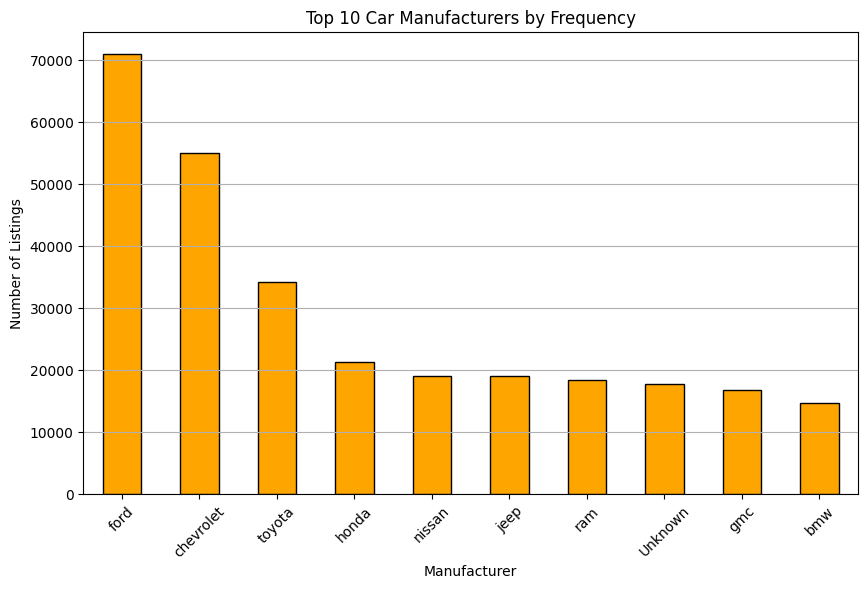

In [27]:
# Visualization
plt.figure(figsize=(10, 6))
top_manufacturers.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Car Manufacturers by Frequency')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### What is the distribution of car conditions in the dataset?

In [28]:
# Count the number of listings for each condition
condition_counts = df['condition'].value_counts()
condition_counts

condition
Unknown      174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

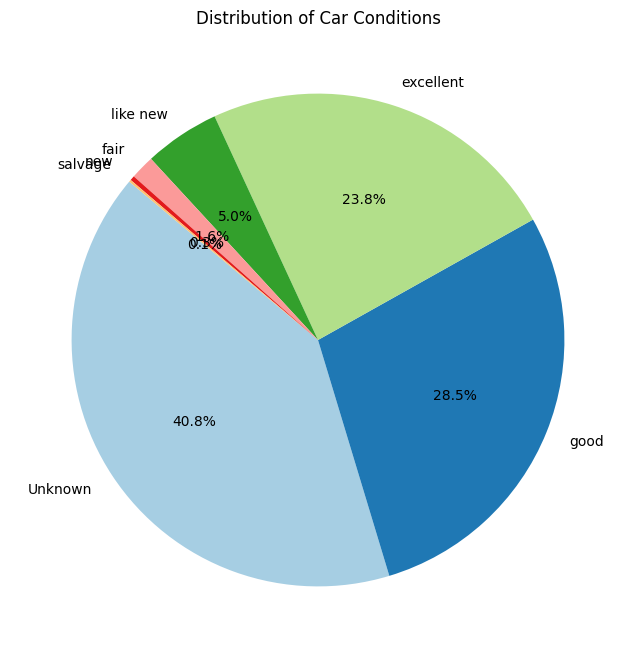

In [29]:
# Visualization
plt.figure(figsize=(8, 8))
condition_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Car Conditions')
plt.ylabel('')  # Remove default y-label
plt.show()


### What are the top 10 most common car models listed in the dataset?

In [30]:
# Count the number of listings for each model
top_models = df['model'].value_counts().head(10)  # Top 10 car models
top_models



model
F-150             8075
Unknown           5280
Silverado 1500    5142
1500              4211
Camry             3139
Silverado         3024
Accord            2972
Wrangler          2851
Civic             2800
Altima            2779
Name: count, dtype: int64

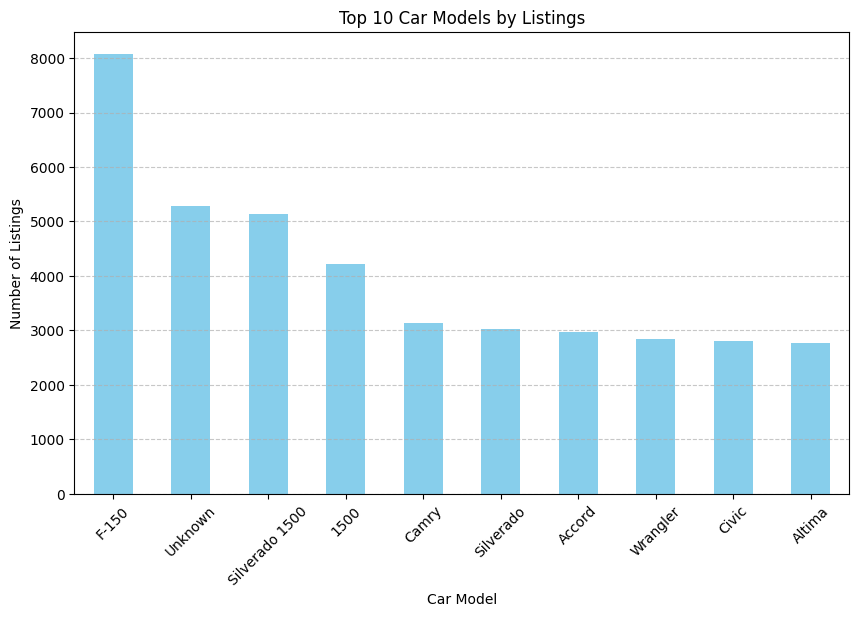

In [31]:
# Visualization 
plt.figure(figsize=(10, 6))
top_models.plot(kind='bar', color='skyblue')
plt.title('Top 10 Car Models by Listings')
plt.xlabel('Car Model')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### How is the distribution of car listings across all states?

In [32]:
# Group by state and count listings
state_counts = df['state'].value_counts()
state_counts


state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
or    17104
mi    16900
nc    15277
wa    13861
pa    13753
wi    11398
co    11088
tn    11066
va    10732
il    10387
nj     9742
id     8961
az     8679
ia     8632
ma     8174
mn     7716
ga     7003
ok     6792
sc     6327
mt     6294
ks     6209
in     5704
ct     5188
al     4955
md     4778
nm     4425
mo     4293
ky     4149
ar     4038
ak     3474
la     3196
nv     3194
nh     2981
dc     2970
me     2966
hi     2964
vt     2513
ri     2320
sd     1302
ut     1150
wv     1052
ne     1036
ms     1016
de      949
wy      610
nd      410
Name: count, dtype: int64

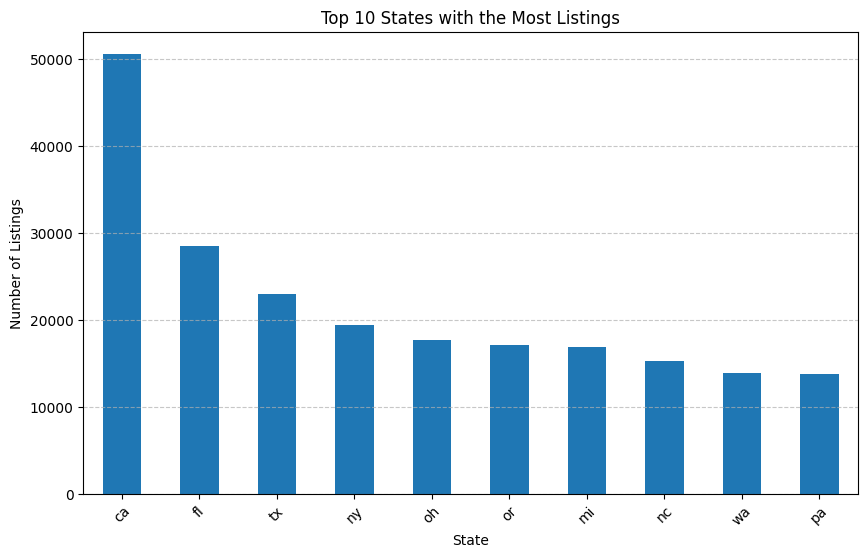

In [33]:
# Visualization for top 10 states
state_counts = df['state'].value_counts().head(10)

plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar')
plt.title('Top 10 States with the Most Listings')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### What is the average price of vehicles based on their condition?

In [34]:
# Calculate average price by condition
avg_price_by_condition = df.groupby('condition')['price'].mean().sort_values(ascending=False)
avg_price_by_condition


condition
fair         761178.644999
Unknown       99498.514440
excellent     52313.938413
like new      37193.901454
good          32829.380088
new           25645.772414
salvage        3755.284526
Name: price, dtype: float64

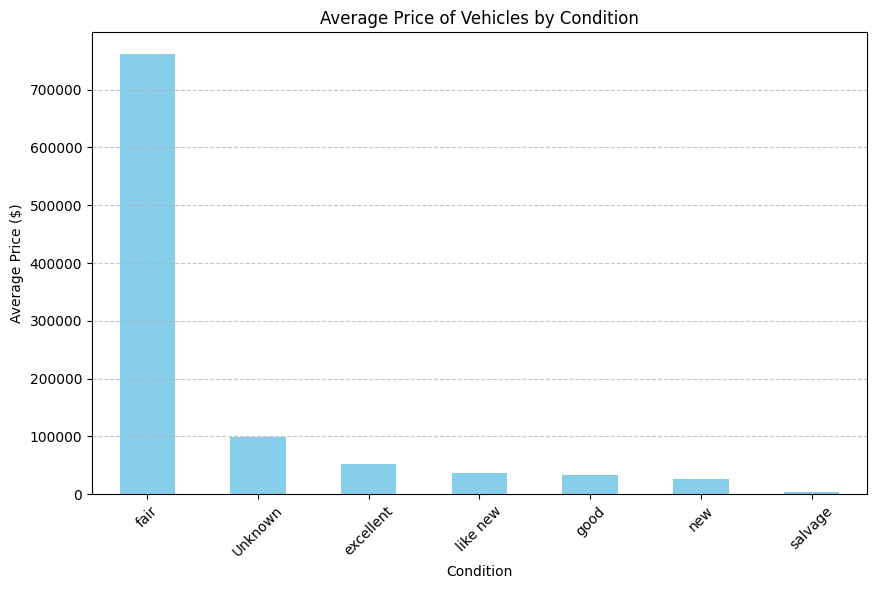

In [35]:
# Visualization
plt.figure(figsize=(10, 6))
avg_price_by_condition.plot(kind='bar', color='skyblue')
plt.title('Average Price of Vehicles by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### What are the fuel type preferences for the top 10 vehicle manufacturers?

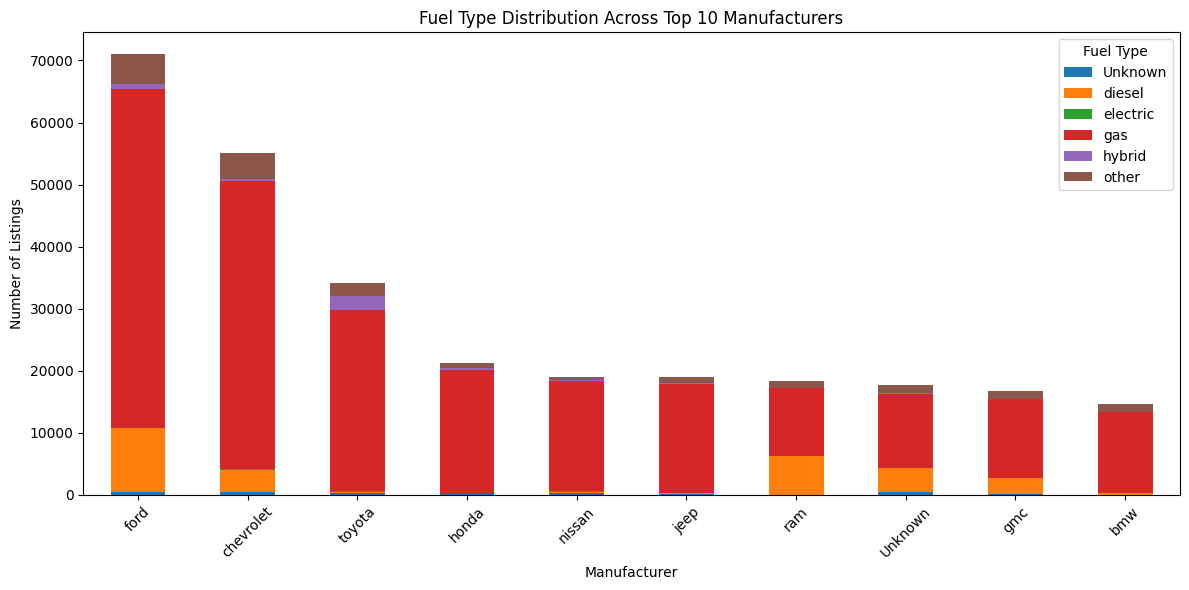

In [36]:
# Group by 'manufacturer' and 'fuel' to get counts
fuel_manufacturer_counts = df.groupby(['manufacturer', 'fuel']).size().unstack(fill_value=0)

# Filter top 10 manufacturers by total counts for better visualization
top_manufacturers = fuel_manufacturer_counts.sum(axis=1).nlargest(10).index
fuel_manufacturer_counts = fuel_manufacturer_counts.loc[top_manufacturers]

# Plot the data
fuel_manufacturer_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Fuel Type Distribution Across Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()


### How does the transmission type affect the average price of vehicles?

In [37]:
# Calculate the average price by transmission type
avg_price_by_transmission = df.groupby('transmission')['price'].mean().sort_values()
avg_price_by_transmission

transmission
Unknown       18851.525039
other         30288.559124
automatic     76205.411165
manual       199168.187714
Name: price, dtype: float64

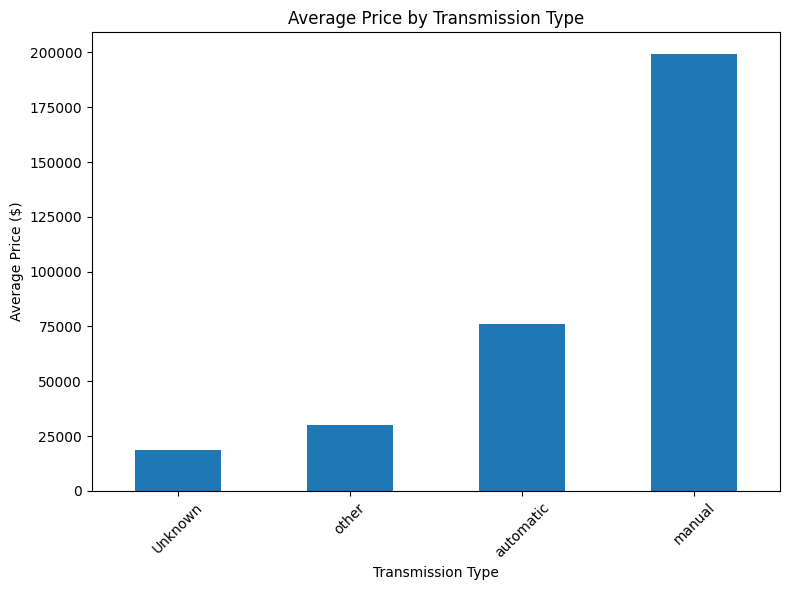

In [38]:
# Plot the average price by transmission type
plt.figure(figsize=(8, 6))
avg_price_by_transmission.plot(kind='bar')
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What is the distribution of listings across different vehicle types?

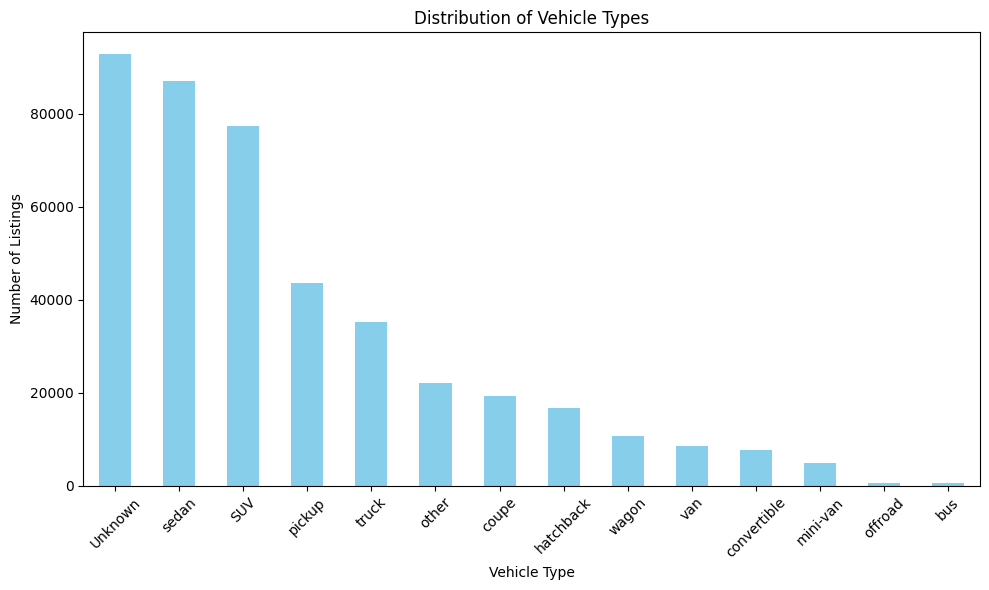

In [39]:
# Calculate the count and average price by vehicle type
vehicle_type_summary = df.groupby('type')['price'].agg(['count', 'mean']).sort_values('count', ascending=False)

# Plot the distribution of vehicle types
plt.figure(figsize=(10, 6))
vehicle_type_summary['count'].plot(kind='bar', color='skyblue')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What is the average price for each vehicle type?

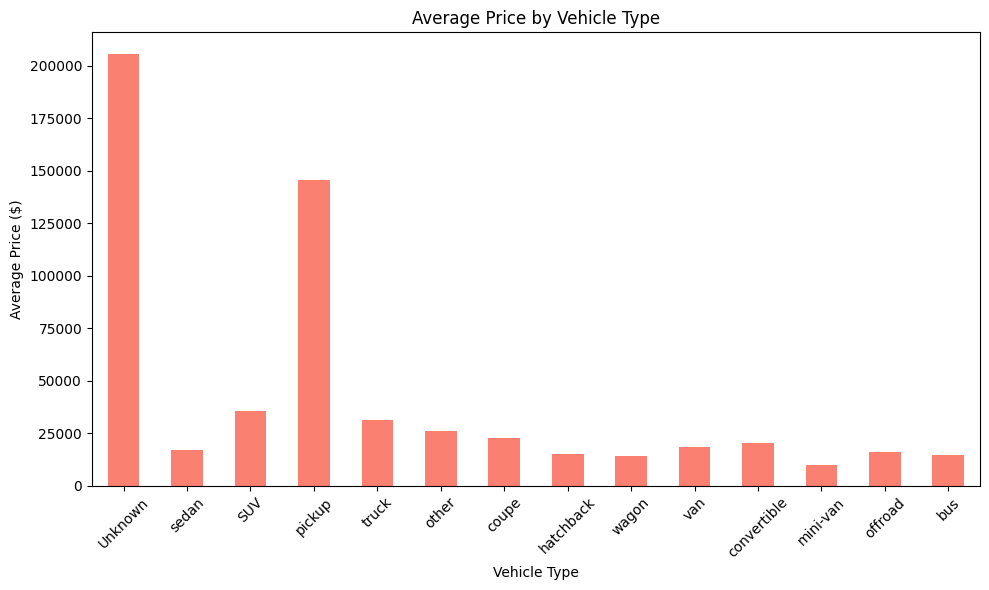

In [40]:
# Plot the average price by vehicle type
plt.figure(figsize=(10, 6))
vehicle_type_summary['mean'].plot(kind='bar', color='salmon')
plt.title('Average Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What is the distribution of listings based on fuel type?

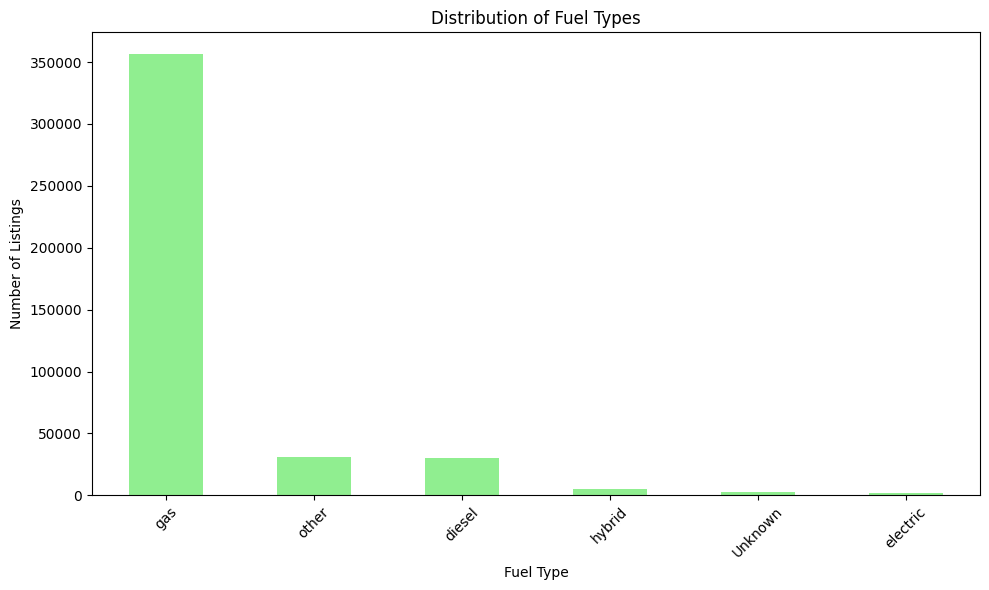

In [41]:
# Calculate the count and average price by fuel type
fuel_summary = df.groupby('fuel')['price'].agg(['count', 'mean']).sort_values('count', ascending=False)

# Plot the distribution of fuel types
plt.figure(figsize=(10, 6))
fuel_summary['count'].plot(kind='bar', color='lightgreen')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What is the average price for vehicles with different fuel types?

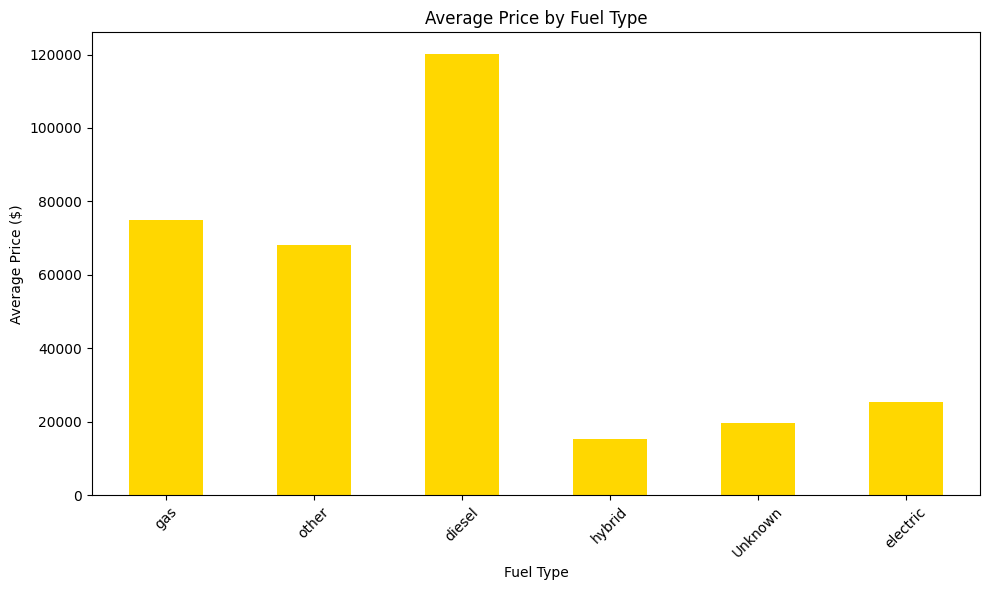

In [42]:
# Plot the average price by fuel type
plt.figure(figsize=(10, 6))
fuel_summary['mean'].plot(kind='bar', color='gold')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### How does the average price vary with the number of cylinders in a vehicle?

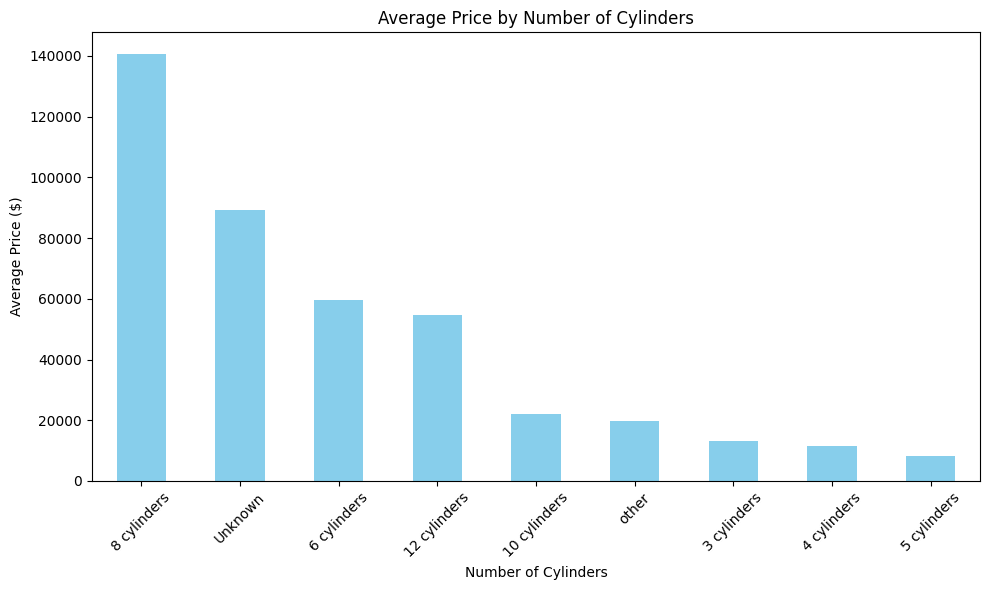

In [43]:
# Calculate the average price by the number of cylinders
cylinders_summary = df.groupby('cylinders')['price'].agg(['count', 'mean']).sort_values('mean', ascending=False)

# Plot the distribution of average price by the number of cylinders
plt.figure(figsize=(10, 6))
cylinders_summary['mean'].plot(kind='bar', color='skyblue')
plt.title('Average Price by Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
